In [ ]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
from mlxtend.preprocessing import TransactionEncoder 
from mlxtend.frequent_patterns import fpgrowth, fpmax, apriori
from math import isnan 
df = pd.read_csv('pretty_car_price_dataset.csv') 
print(df.head(5))

        Бренд  Модель  ...  Количество владельцев  Стоимость
0         Kia     Rio  ...                      5       8501
1   Chevrolet  Malibu  ...                      3      12092
2    Mercedes     GLA  ...                      2      11171
3        Audi      Q5  ...                      1      11780
4  Volkswagen    Golf  ...                      3       2867

[5 rows x 10 columns]


Преобразование данных для анализа

In [2]:
np_df = df.to_numpy() 
np_df = [[elem for elem in [row[0], row[4], row[5]] if isinstance(elem,str)] for row in np_df] 
print(np_df)

[['Kia', 'Diesel', 'Manual'], ['Chevrolet', 'Hybrid', 'Automatic'], ['Mercedes', 'Diesel', 'Automatic'], ['Audi', 'Electric', 'Manual'], ['Volkswagen', 'Hybrid', 'Semi-Automatic'], ['Toyota', 'Petrol', 'Automatic'], ['Honda', 'Electric', 'Automatic'], ['Kia', 'Electric', 'Semi-Automatic'], ['Kia', 'Hybrid', 'Manual'], ['Toyota', 'Petrol', 'Manual'], ['BMW', 'Hybrid', 'Automatic'], ['Volkswagen', 'Hybrid', 'Manual'], ['Honda', 'Hybrid', 'Automatic'], ['Hyundai', 'Hybrid', 'Semi-Automatic'], ['Volkswagen', 'Petrol', 'Automatic'], ['Volkswagen', 'Diesel', 'Automatic'], ['Hyundai', 'Electric', 'Automatic'], ['Volkswagen', 'Electric', 'Manual'], ['Kia', 'Diesel', 'Semi-Automatic'], ['Mercedes', 'Petrol', 'Manual'], ['Chevrolet', 'Hybrid', 'Automatic'], ['Toyota', 'Hybrid', 'Semi-Automatic'], ['Toyota', 'Electric', 'Manual'], ['Ford', 'Hybrid', 'Manual'], ['Mercedes', 'Petrol', 'Semi-Automatic'], ['Kia', 'Diesel', 'Automatic'], ['Audi', 'Electric', 'Manual'], ['BMW', 'Electric', 'Semi-Automa

Кодирование данных

In [3]:
te = TransactionEncoder()
te_ary = te.fit(np_df).transform(np_df)
df_new = pd.DataFrame(te_ary, columns=te.columns_)
print(df_new.head())

    Audi  Automatic    BMW  ...  Semi-Automatic  Toyota  Volkswagen
0  False      False  False  ...           False   False       False
1  False       True  False  ...           False   False       False
2  False       True  False  ...           False   False       False
3   True      False  False  ...           False   False       False
4  False      False  False  ...            True   False        True

[5 rows x 17 columns]


FPGrowth

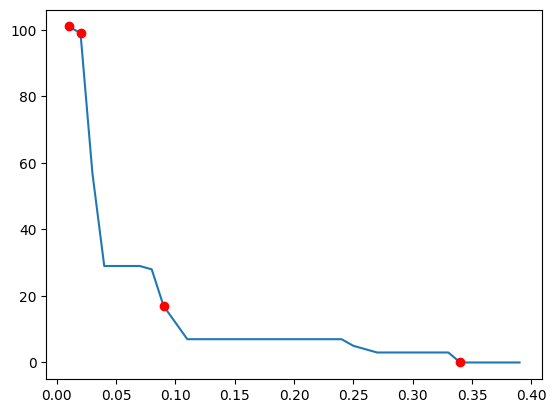

In [4]:
min_support_range = np.arange(0.01, 0.4, 0.01) 
itemsets_lengths = [] 
threshold_supports = [] 
threshold_lengths = [] 
last_itemset_len = len(df_new.columns) 
for min_support in min_support_range: 
    fpg = fpgrowth(df_new, min_support=min_support, use_colnames=True) 
    itemsets_lengths.append(len(fpg)) 
    fpg['length'] = fpg['itemsets'].apply(lambda x: len(x)) 
    current_itemset_max_len = fpg['length' ].max() 
    if isnan(current_itemset_max_len): 
        current_itemset_max_len = 0 
    if current_itemset_max_len < last_itemset_len: 
        last_itemset_len = current_itemset_max_len 
        threshold_supports.append(min_support) 
        threshold_lengths.append(len(fpg)) 
plt.figure() 
plt.plot(min_support_range.tolist(), itemsets_lengths) 
plt.plot(threshold_supports, threshold_lengths, 'ro') 
plt.show() 

FPmax

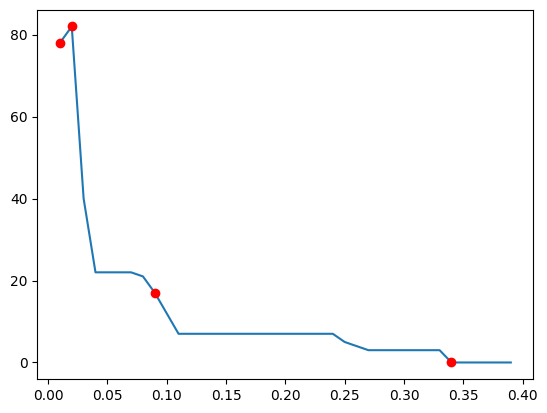

In [5]:
min_support_range = np.arange(0.01, 0.4, 0.01) 
itemsets_lengths = [] 
threshold_supports = [] 
threshold_lengths = [] 
last_itemset_len = len(df_new.columns) 
for min_support in min_support_range: 
    fpm = fpmax(df_new, min_support=min_support, use_colnames=True) 
    itemsets_lengths.append(len(fpm)) 
    fpm['length'] = fpm['itemsets'].apply(lambda x: len(x)) 
    current_itemset_max_len = fpm['length' ].max() 
    if isnan(current_itemset_max_len): 
        current_itemset_max_len = 0 
    if current_itemset_max_len < last_itemset_len: 
        last_itemset_len = current_itemset_max_len 
        threshold_supports.append(min_support) 
        threshold_lengths.append(len(fpm)) 
plt.figure() 
plt.plot(min_support_range.tolist(), itemsets_lengths) 
plt.plot(threshold_supports, threshold_lengths, 'ro') 
plt.show() 

FPGrowth (первый график)
Высота столбцов:
При min_support=0.01 алгоритм находит 100 частых наборов.
С ростом min_support количество наборов резко падает.

Интерпретация:
FPGrowth обнаруживает все возможные комбинации брендов, типов топлива и трансмиссий, даже редкие.
Чем ниже min_support, тем больше "шумных" ассоциаций (например, уникальные комбинации для редких брендов).


FPmax (второй график)
Высота столбцов:
При min_support=0.01 алгоритм находит 80 наборов (на 20% меньше, чем FPGrowth).

Интерпретация:
FPmax возвращает только максимальные частые наборы, исключая подмножества.
Если (Kia, Diesel, Manual) и (Kia, Diesel) частые, FPmax сохранит только первый.
Это объясняет меньший объем результатов по сравнению с FPGrowth.

Использовать FPmax для сокращения избыточности, если нужны только ключевые ассоциации.
FPGrowth — для детального анализа всех возможных комбинаций.

Алгоритмы ассоциативных правил?
реализовать 2 алгоритма

Обучение ассоциативным правилам или поиск ассоциативных правил — это метод машинного обучения на базе правил обнаружения интересующих нас связей между переменными в большой базе данных. Метод предлагается для установления сильных правил, обнаруженных в базе данных с помощью некоторых мер интересности. 

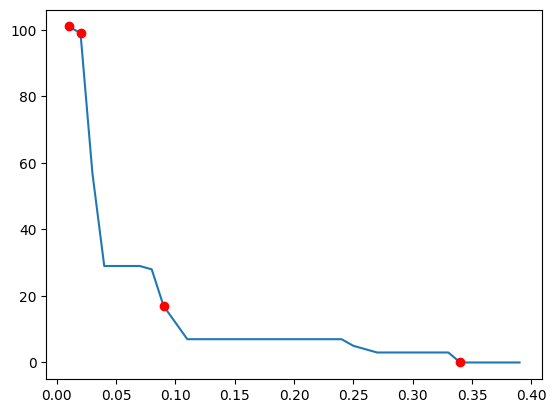

In [6]:
min_support_range = np.arange(0.01, 0.4, 0.01) 
itemsets_lengths = [] 
threshold_supports = [] 
threshold_lengths = [] 
last_itemset_len = len(df_new.columns) 
for min_support in min_support_range: 
    fpm = apriori(df_new, min_support=min_support, use_colnames=True) 
    itemsets_lengths.append(len(fpm)) 
    fpm['length'] = fpm['itemsets'].apply(lambda x: len(x)) 
    current_itemset_max_len = fpm['length' ].max() 
    if isnan(current_itemset_max_len): 
        current_itemset_max_len = 0 
    if current_itemset_max_len < last_itemset_len: 
        last_itemset_len = current_itemset_max_len 
        threshold_supports.append(min_support) 
        threshold_lengths.append(len(fpm)) 
plt.figure() 
plt.plot(min_support_range.tolist(), itemsets_lengths) 
plt.plot(threshold_supports, threshold_lengths, 'ro') 
plt.show() 

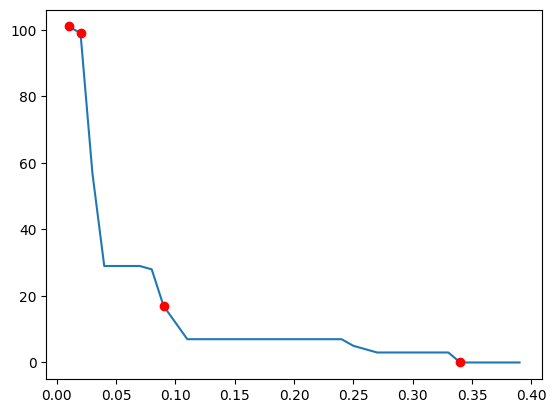

In [ ]:
def eclat(df, min_support):
    items = {}
    for idx, row in df.iterrows():
        tid = idx
        for item in df.columns[row]:
            if item not in items:
                items[item] = set()
            items[item].add(tid)
    frequent_items = {}
    for item, tids in items.items():
        support = len(tids) / len(df)
        if support >= min_support:
            frequent_items[frozenset([item])] = tids
    k = 2
    while True:
        new_itemsets = {}
        itemsets = list(frequent_items.keys())
        for i in range(len(itemsets)):
            for j in range(i+1, len(itemsets)):
                itemset1 = itemsets[i]
                itemset2 = itemsets[j]
                if len(itemset1.union(itemset2)) == k:
                    new_itemset = itemset1.union(itemset2)
                    tids = frequent_items[itemset1].intersection(frequent_items[itemset2])
                    support = len(tids) / len(df)
                    if support >= min_support:
                        new_itemsets[new_itemset] = tids
        if not new_itemsets:
            break
        frequent_items.update(new_itemsets)
        k += 1
    result = []
    for itemset, tids in frequent_items.items():
        support = len(tids) / len(df)
        result.append((itemset, support))
    result_df = pd.DataFrame(result, columns=['itemsets', 'support'])
    return result_df

min_support_range = np.arange(0.01, 0.4, 0.01) 
itemsets_lengths = [] 
threshold_supports = [] 
threshold_lengths = [] 
last_itemset_len = len(df_new.columns) 
for min_support in min_support_range: 
    fpm = eclat(df_new, min_support=min_support) 
    itemsets_lengths.append(len(fpm)) 
    fpm['length'] = fpm['itemsets'].apply(lambda x: len(x)) 
    current_itemset_max_len = fpm['length' ].max() 
    if isnan(current_itemset_max_len): 
        current_itemset_max_len = 0 
    if current_itemset_max_len < last_itemset_len: 
        last_itemset_len = current_itemset_max_len 
        threshold_supports.append(min_support) 
        threshold_lengths.append(len(fpm)) 
plt.figure() 
plt.plot(min_support_range.tolist(), itemsets_lengths) 
plt.plot(threshold_supports, threshold_lengths, 'ro') 
plt.show() 